In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [5]:
df = pd.read_csv(r'/Users/manohar/Documents/Manohar/Semester - 2/Intro to BA/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [48]:
df.shape

(7043, 21)

In [12]:
# Make a copy of the original DataFrame
df_processed = df.copy()

# Convert 'TotalCharges' to numeric (it may contain spaces or non-numeric values)
df_processed['TotalCharges'] = pd.to_numeric(df_processed['TotalCharges'], errors='coerce')

# Drop rows with NaN values
df_processed.dropna(inplace=True)

# Drop 'customerID' since it doesn't help in prediction
df_processed.drop('customerID', axis=1, inplace=True)

# Identify categorical columns
categorical_cols = df_processed.select_dtypes(include='object').columns.tolist()

# Encode target variable 'Churn' (Yes/No -> 1/0)
target = 'Churn'
label_encoder = LabelEncoder()
df_processed[target] = label_encoder.fit_transform(df_processed[target])  # Yes -> 1, No -> 0

# Encode all other categorical features
for col in categorical_cols:
    if col != target:
        if df_processed[col].nunique() == 2:
            # Binary encoding
            df_processed[col] = label_encoder.fit_transform(df_processed[col])
        else:
            # One-hot encoding for features with more than 2 unique values
            df_processed = pd.get_dummies(df_processed, columns=[col])

# Identify numeric columns
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Apply StandardScaler to normalize the numeric features
scaler = StandardScaler()
df_processed[numeric_cols] = scaler.fit_transform(df_processed[numeric_cols])

# Final preprocessed dataset is ready
print("Final shape of processed data:", df_processed.shape)

Final shape of processed data: (7032, 41)


In [24]:
df_processed.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,-1.280248,0,1,-1.161694,-0.994194,0,...,True,False,False,True,False,False,False,False,True,False
1,1,0,0,0,0.064303,1,0,-0.260878,-0.173740,0,...,True,False,False,False,True,False,False,False,False,True
2,1,0,0,0,-1.239504,1,1,-0.363923,-0.959649,1,...,True,False,False,True,False,False,False,False,False,True
3,1,0,0,0,0.512486,0,0,-0.747850,-0.195248,0,...,True,False,False,False,True,False,True,False,False,False
4,0,0,0,0,-1.239504,1,1,0.196178,-0.940457,1,...,True,False,False,True,False,False,False,False,True,False


/var/folders/p5/5xb3kg8n2y14szb0ppfkj3xh0000gn/T/ipykernel_1237/4070555979.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_processed, x='Churn', palette='Set2')


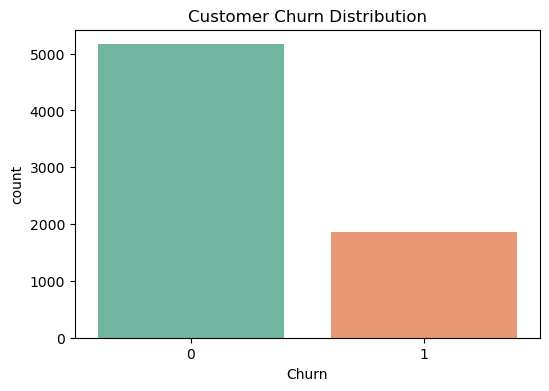

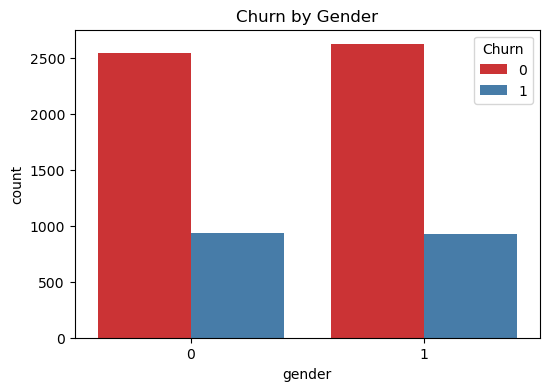

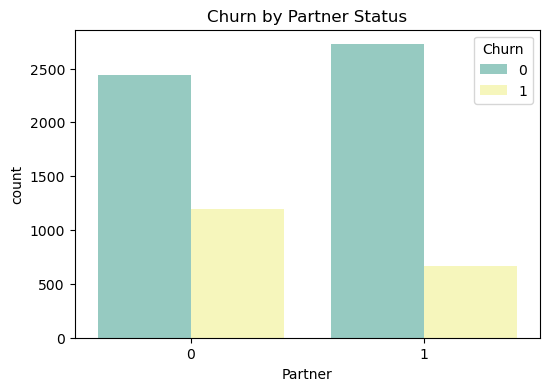

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(data=df_processed, x='Churn', palette='Set2')
plt.title("Customer Churn Distribution")
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(data=df_processed, x='gender', hue='Churn', palette='Set1')
plt.title("Churn by Gender")
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(data=df_processed, x='Partner', hue='Churn', palette='Set3')
plt.title("Churn by Partner Status")
plt.show()

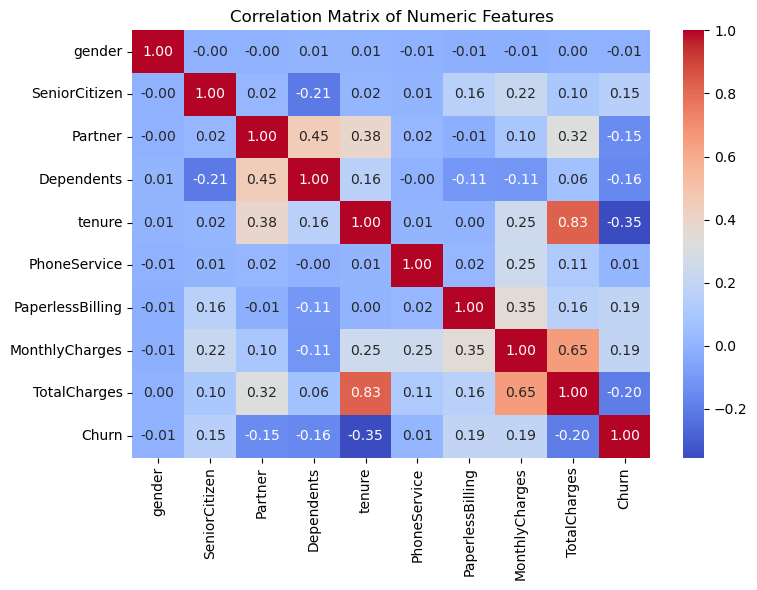

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.011902,-0.013779,0.000048,-0.008545
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.156258,0.219874,0.102411,0.150541
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,-0.013957,0.097825,0.319072,-0.149982
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.110131,-0.112343,0.064653,-0.163128
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.004823,0.246862,0.825880,-0.354049
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,0.016696,0.248033,0.113008,0.011691
PaperlessBilling,-0.011902,0.156258,-0.013957,-0.110131,0.004823,0.016696,1.000000,0.351930,0.157830,0.191454
MonthlyCharges,-0.013779,0.219874,0.097825,-0.112343,0.246862,0.248033,0.351930,1.000000,0.651065,0.192858
TotalCharges,0.000048,0.102411,0.319072,0.064653,0.825880,0.113008,0.157830,0.651065,1.000000,-0.199484
Churn,-0.008545,0.150541,-0.149982,-0.163128,-0.354049,0.011691,0.191454,0.192858,-0.199484,1.000000


In [46]:
numeric_features = df_processed.select_dtypes(include=['int64', 'float64'])

# Correlation matrix
corr_matrix = numeric_features.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.show()

corr_matrix

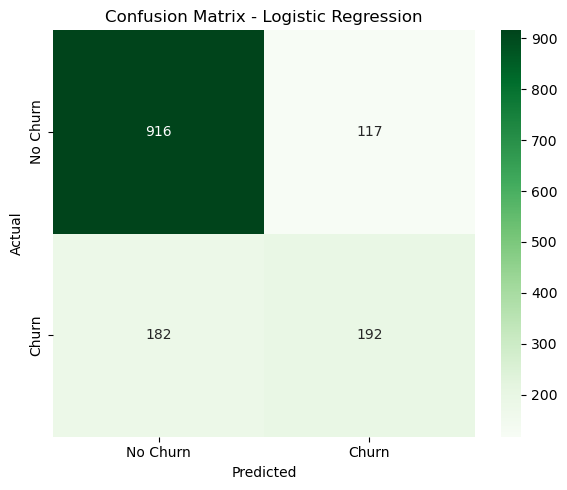

Accuracy 0.7874911158493249
Classification Report
               precision    recall  f1-score      support
0              0.834244  0.886738  0.859690  1033.000000
1              0.621359  0.513369  0.562225   374.000000
accuracy       0.787491  0.787491  0.787491     0.787491
macro avg      0.727802  0.700053  0.710958  1407.000000
weighted avg   0.777656  0.787491  0.780620  1407.000000


In [38]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predict on test set
y_pred_log = log_reg.predict(X_test)

# Accuracy
accuracy_log = accuracy_score(y_test, y_pred_log)

# Classification report
class_report_log = classification_report(y_test, y_pred_log, output_dict=True)
class_report_log_df = pd.DataFrame(class_report_log).transpose()

# Confusion matrix
conf_matrix_log = confusion_matrix(y_test, y_pred_log)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_log, annot=True, fmt='d', cmap='Greens', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.tight_layout()
plt.show()

print("Accuracy", accuracy_log)
print("Classification Report\n", class_report_log_df)

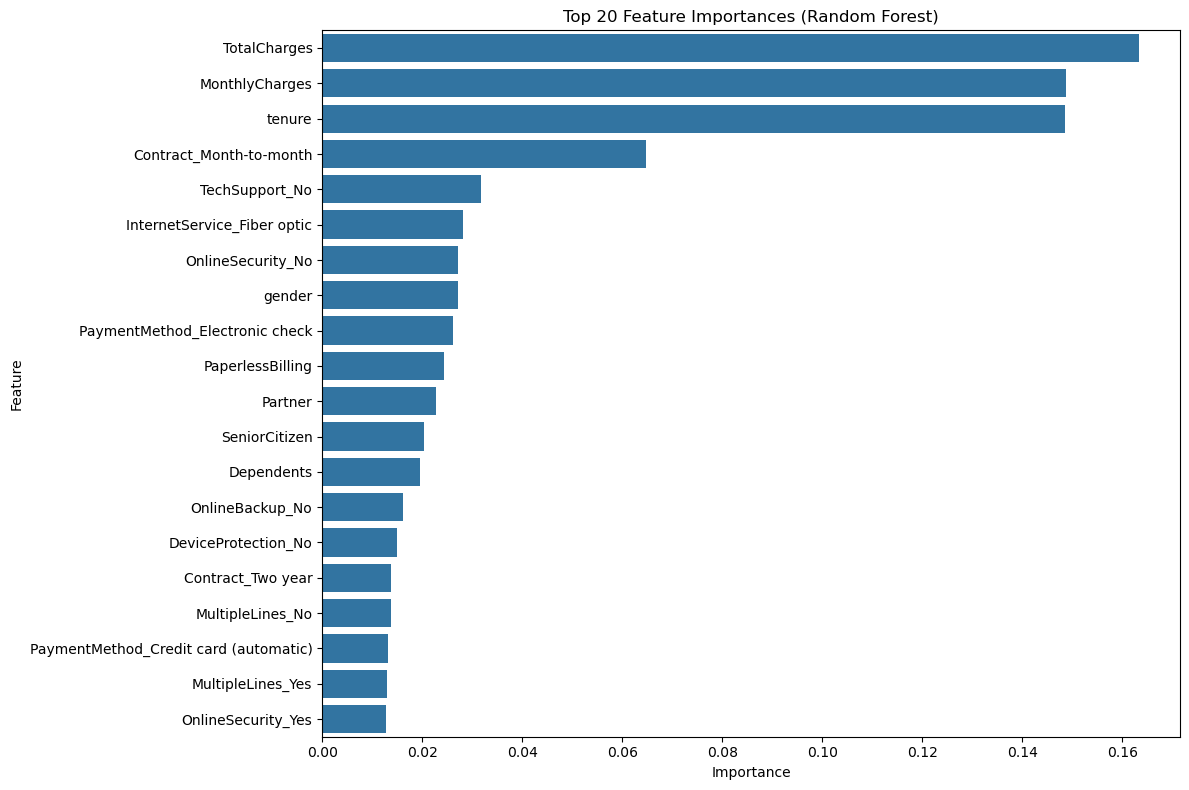

                                  Feature  Importance
8                            TotalCharges    0.163332
7                          MonthlyCharges    0.148727
4                                  tenure    0.148435
33                Contract_Month-to-month    0.064829
24                         TechSupport_No    0.031815
13            InternetService_Fiber optic    0.028185
15                      OnlineSecurity_No    0.027097
0                                  gender    0.027089
38         PaymentMethod_Electronic check    0.026120
6                        PaperlessBilling    0.024330
2                                 Partner    0.022843
1                           SeniorCitizen    0.020378
3                              Dependents    0.019533
18                        OnlineBackup_No    0.016170
21                    DeviceProtection_No    0.014875
35                      Contract_Two year    0.013834
9                        MultipleLines_No    0.013683
37  PaymentMethod_Credit car

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Split into features and target
X = df_processed.drop("Churn", axis=1)
y = df_processed["Churn"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot top 20 important features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
plt.title('Top 20 Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()

# Display top 20 features
print(importance_df.head(20))

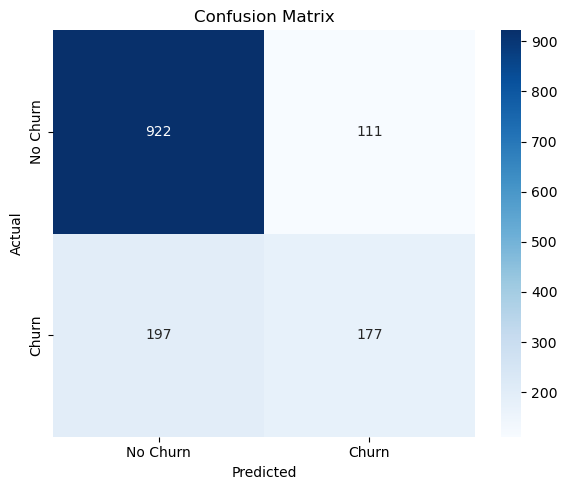

Accuracy 0.7810945273631841
Classification Report
               precision    recall  f1-score      support
0              0.823950  0.892546  0.856877  1033.000000
1              0.614583  0.473262  0.534743   374.000000
accuracy       0.781095  0.781095  0.781095     0.781095
macro avg      0.719267  0.682904  0.695810  1407.000000
weighted avg   0.768297  0.781095  0.771250  1407.000000


In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = rf.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Classification report
class_report = classification_report(y_test, y_pred, output_dict=True)
class_report_df = pd.DataFrame(class_report).transpose()

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

print("Accuracy", accuracy)
print("Classification Report\n", class_report_df)